In [27]:
import numpy as np
import re
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pandas as pd

<IPython.core.display.Javascript object>


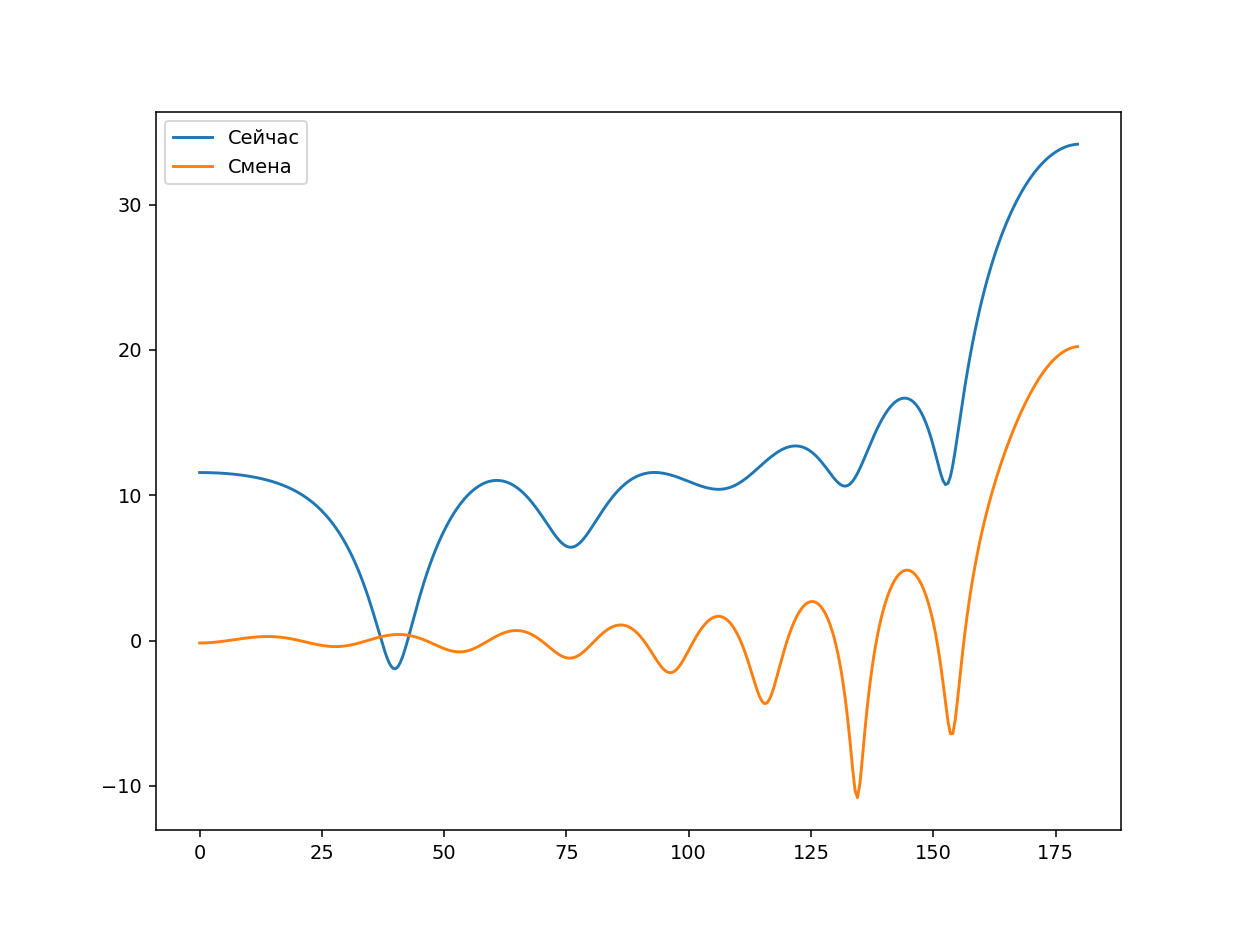

In [28]:
%matplotlib notebook

data = np.loadtxt("../logs/sigma.txt")
xE = data[0]
yE = data[1]
sigmaE = 10 * np.log10(yE / np.pi)
plt.plot(xE, sigmaE, label = 'Сейчас')


data = np.loadtxt("../logs/1026/sigma.txt")
x = data[0]
y = data[1]
sigma = 10 * np.log10(y / np.pi)
plt.plot(x, sigma, label="Смена")

plt.legend()
plt.show()

<IPython.core.display.Javascript object>


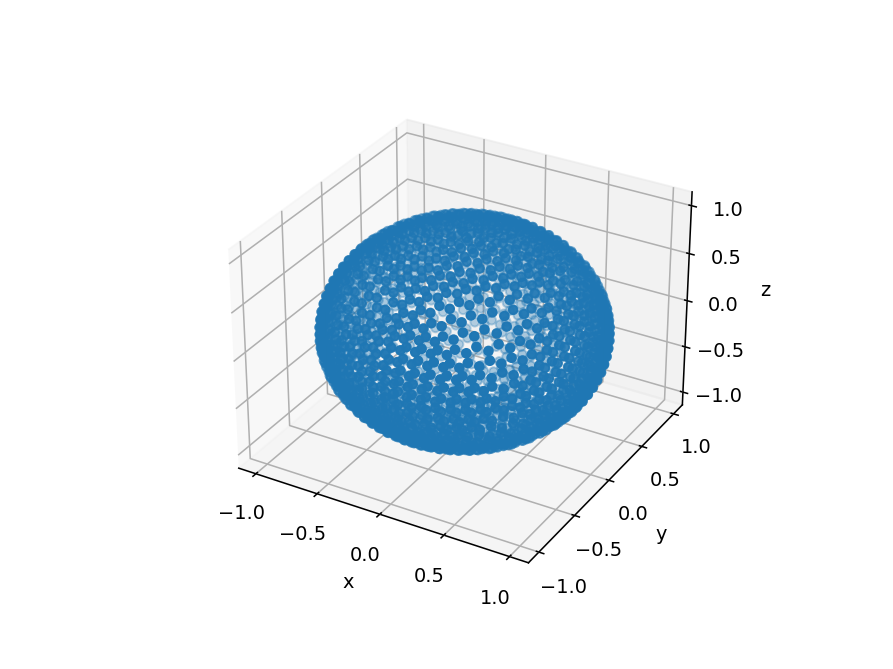

In [29]:
points = np.loadtxt("../logs/points.txt")
real_field_e = np.loadtxt("../logs/grealE.txt")
im_field_e = np.loadtxt("../logs/gimagE.txt")
real_field_m = np.loadtxt("../logs/grealM.txt")
im_field_m = np.loadtxt("../logs/gimagM.txt")

x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.scatter(x, y, z)

In [30]:
def plot_field(points, field):
    x = points[:, 0]
    y = points[:, 1]
    z = points[:, 2]
    u = field[:, 0]
    v = field[:, 1]
    w = field[:, 2]
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

    ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)
    plt.show()

In [31]:
points.shape, real_field_e.shape

((2048, 3), (2048, 3))

<IPython.core.display.Javascript object>


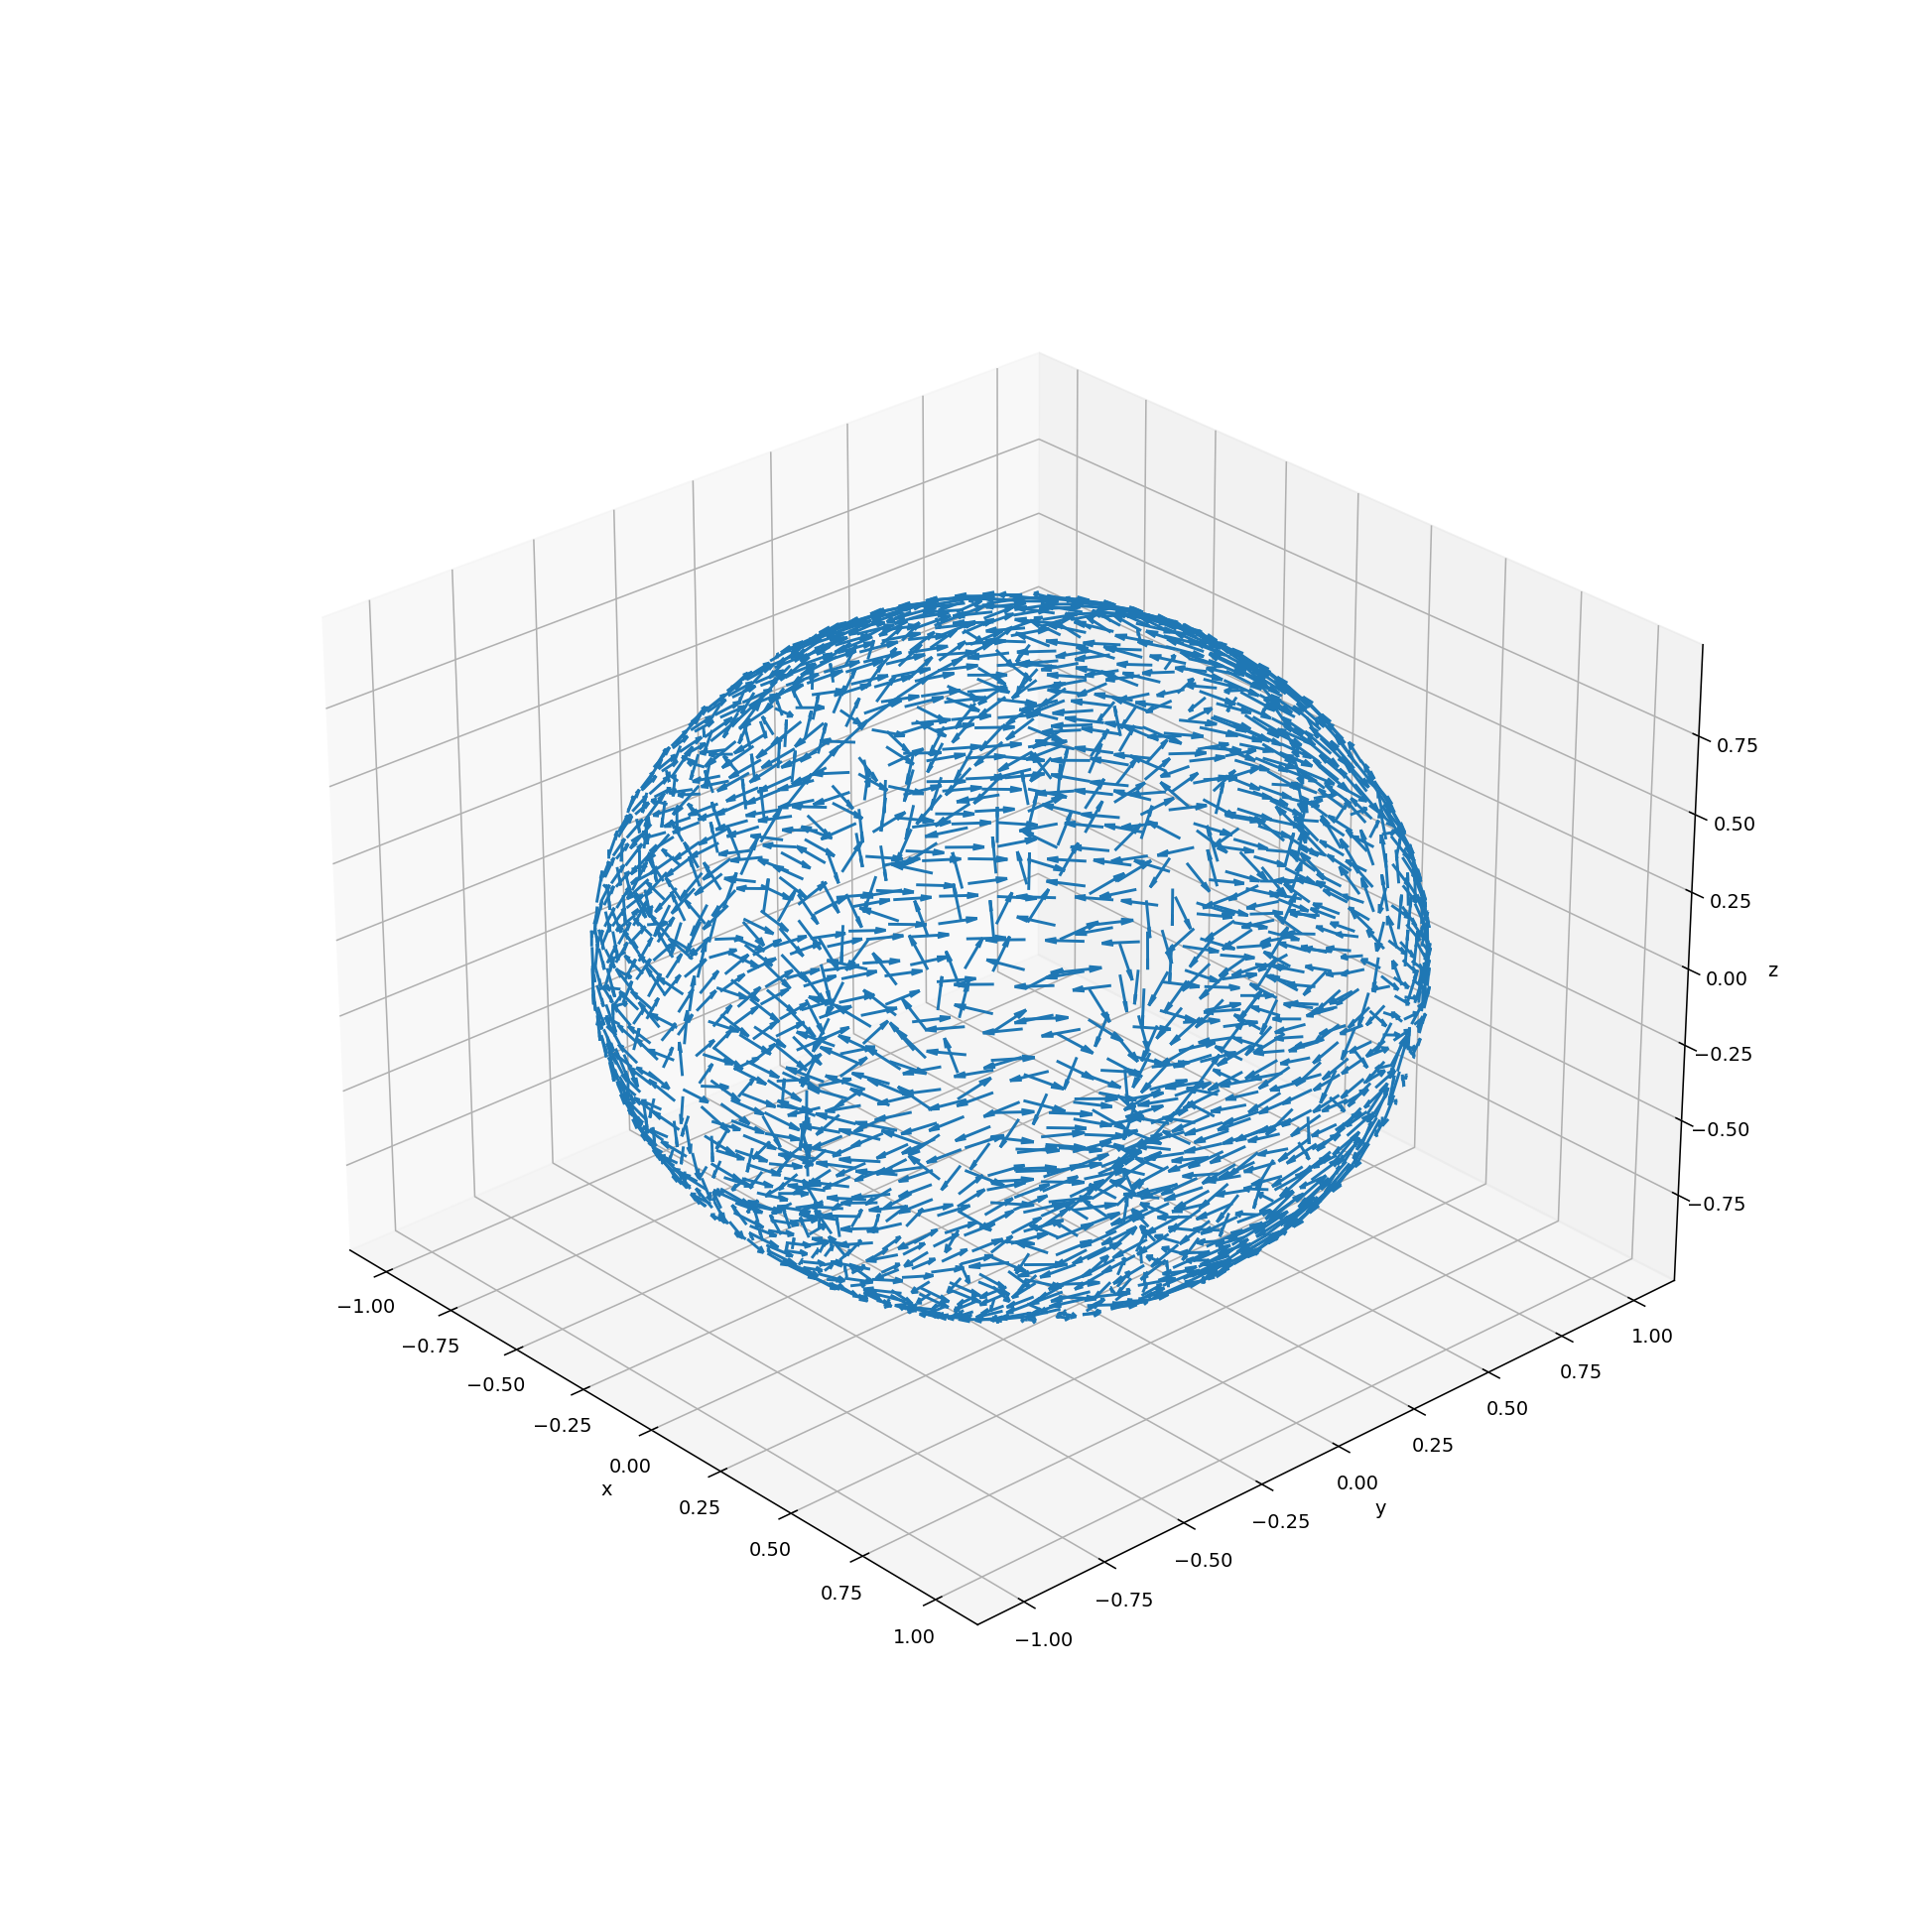

In [32]:
plot_field(points, real_field_e)

<IPython.core.display.Javascript object>


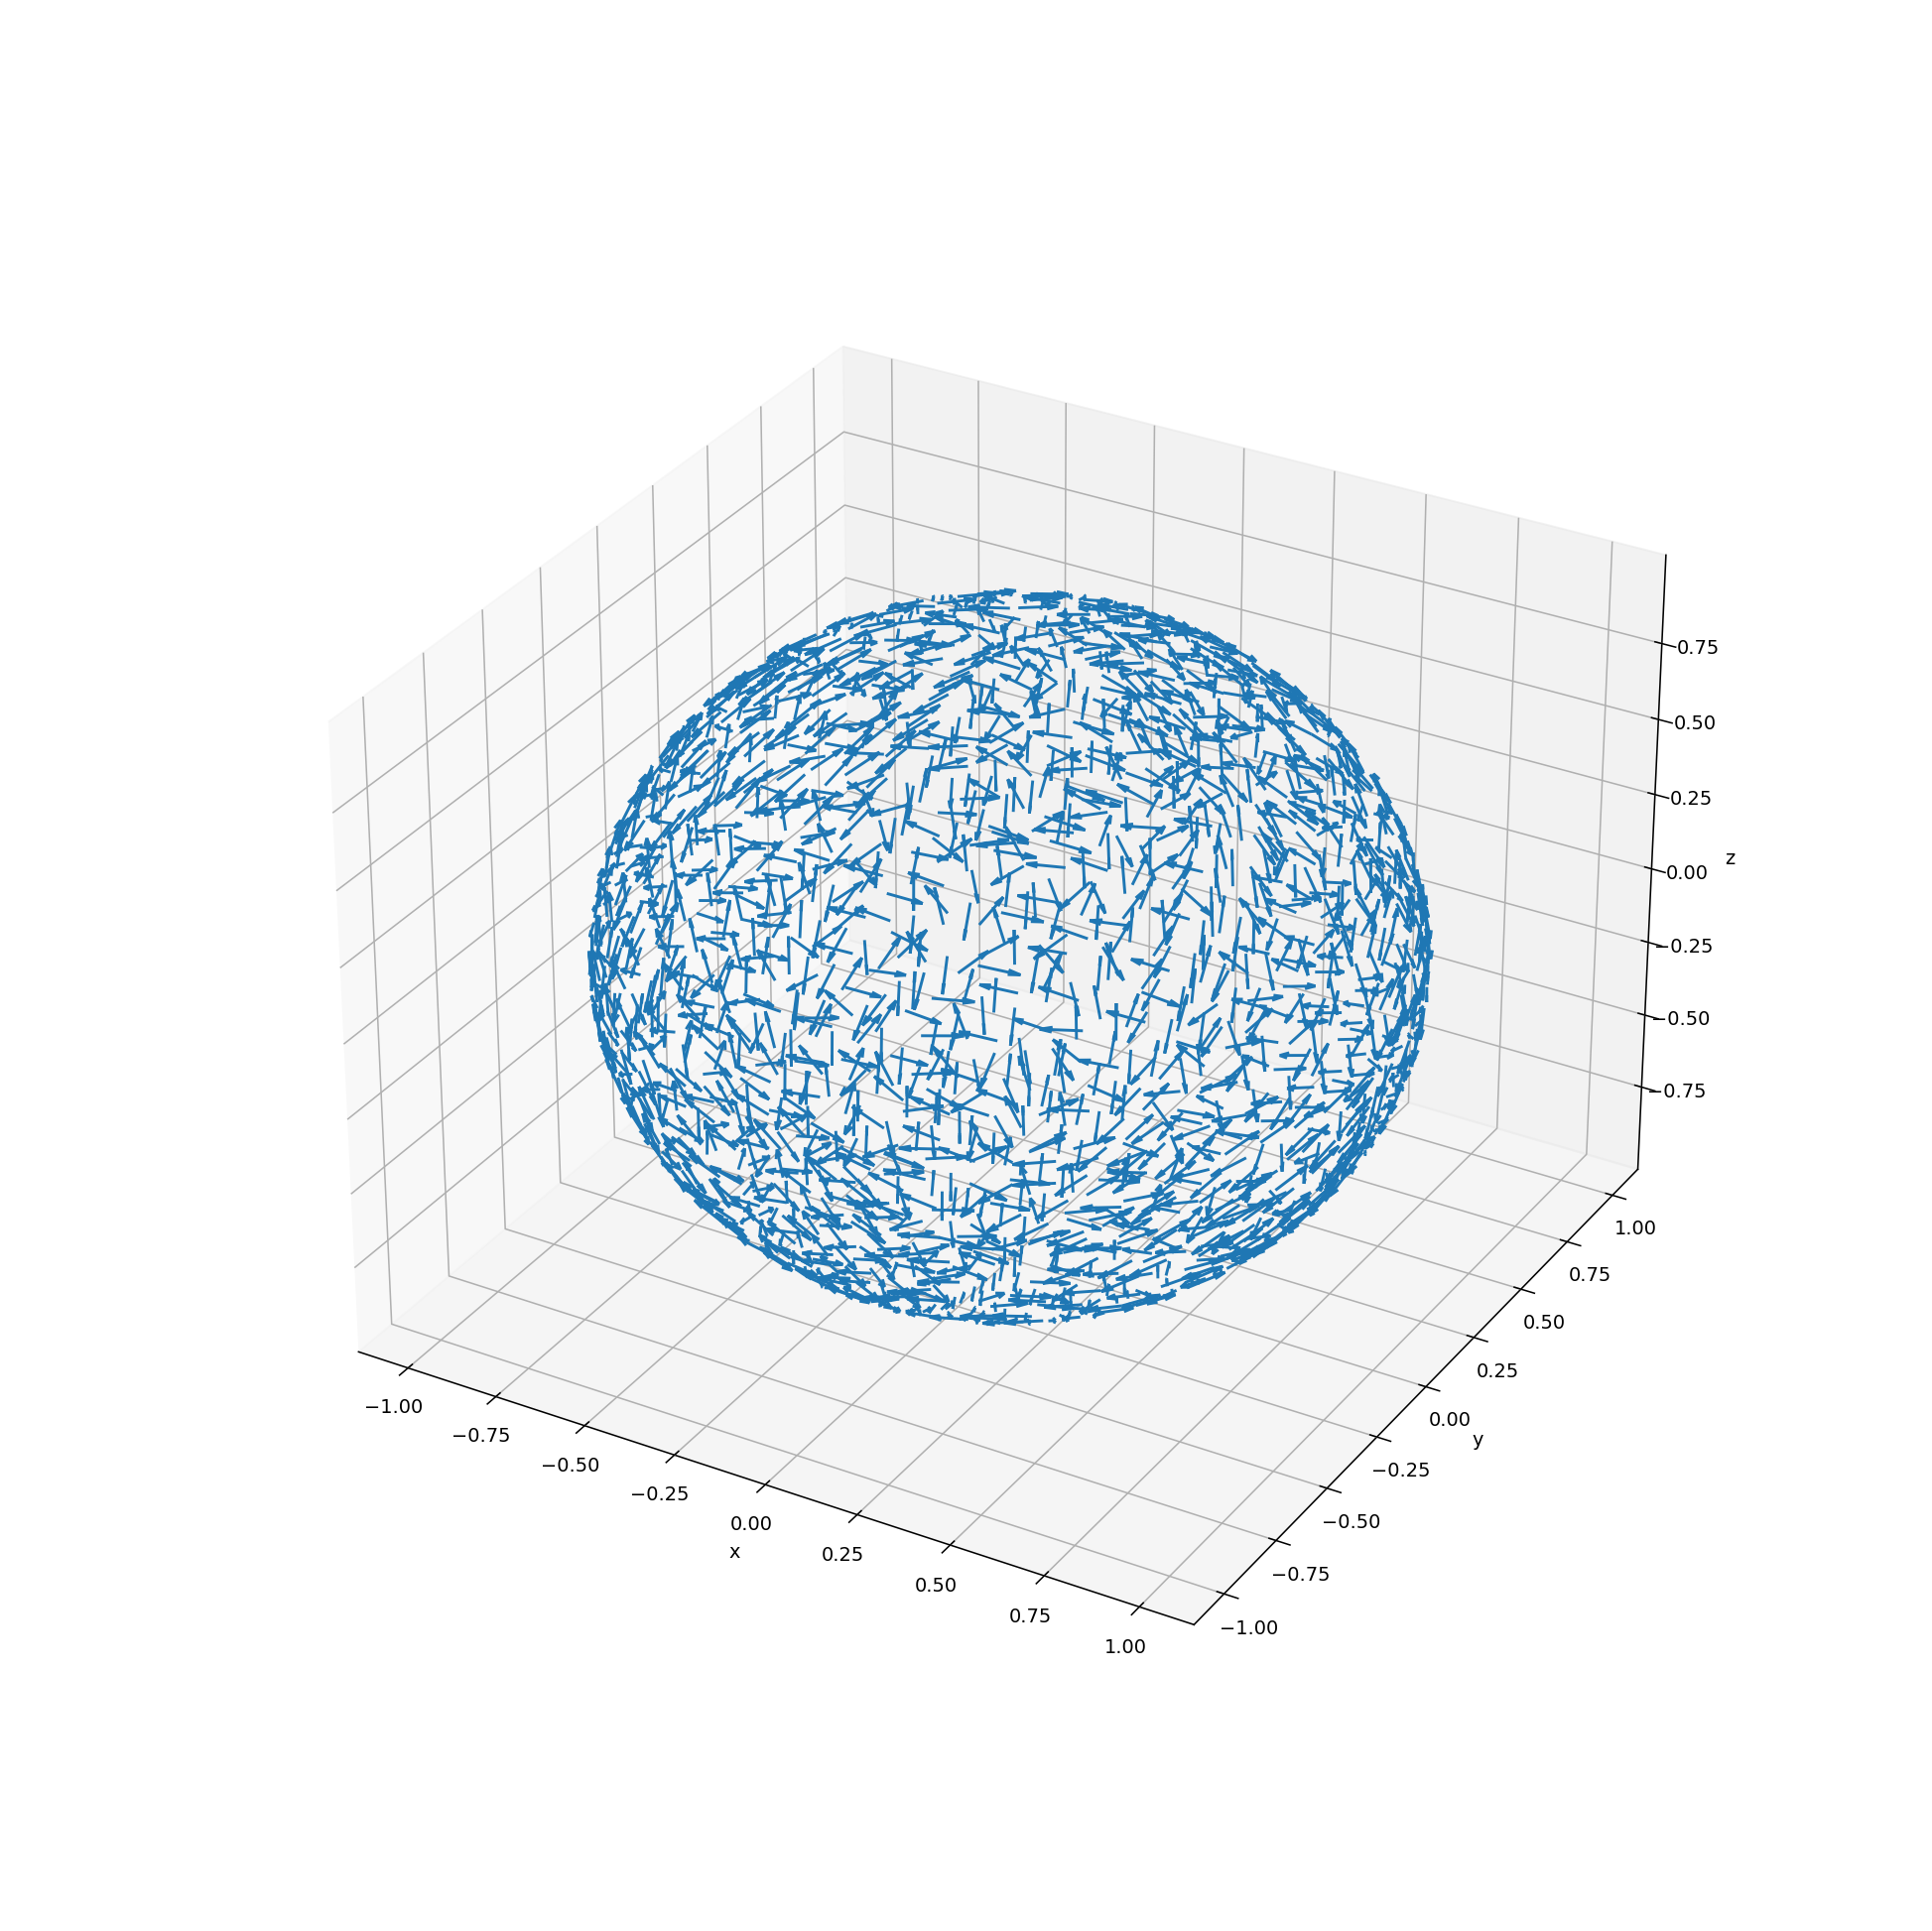

In [33]:
plot_field(points, real_field_m)

In [34]:
fm = real_field_m + 1j * im_field_m
fe = real_field_e + 1j * im_field_e

In [35]:
norms = np.loadtxt("../logs/norms.txt")
norms

array([[ 0.997596,  0.049006,  0.049006],
       [ 0.997525,  0.049716,  0.049716],
       [ 0.987998,  0.146562,  0.048777],
       ...,
       [ 0.845767, -0.460482, -0.269507],
       [ 0.822601, -0.445649, -0.353163],
       [ 0.85948 , -0.443953, -0.253377]])

In [36]:
k = 10
Eplr = np.array([0,1,0])
v = np.array([-1, 0, 0])

def Einc(point):
    return Eplr * np.exp(1j * k * np.dot(v, point))

In [37]:
-np.cross(norms[0], Einc(points[0]))

array([-0.041954  +0.02532685j, -0.        -0.j        ,
        0.85404129-0.51556887j])

In [38]:
fm[0]

array([-0.041673+0.025667j,  0.568311-0.342944j,  0.280017-0.179556j])

In [39]:
-np.cross(norms[100], Einc(points[100]))

array([-0.50132735-0.38280104j, -0.        -0.j        ,
        0.19378443+0.14796895j])

In [40]:
fm[100]

array([ 0.133237+0.053065j,  0.189855+0.13658j , -0.273233-0.180024j])

In [13]:
pair = re.compile('\(([^,\)]+),([^,\)]+)\)')

def parse_pair(s):
    a = complex(*map(float, pair.match(s).groups()))
    return a

In [14]:
m = []
with open("../logs/matrix.txt", 'r') as f:
    for line in f.readlines():
        a = line.split(" ")
        if len(a) > 10:
            temp = [parse_pair(c) for c in a[1:]]
            m += temp
n = 1536

In [15]:
A = np.array(m)
del(m)

In [21]:
A = A.reshape(n, n)

In [16]:
f = []
i = 0
with open("../logs/f.txt", 'r') as file:
    for line in file.readlines():
        a = line.split(" ")
        i += 1
        if i > 2:
            temp = [parse_pair(c) for c in a[1:]]
            f += temp

In [17]:
f = np.array(f)
f.shape

(1536,)

In [22]:
tempA = A[:n//2,n//2:]
tempA.shape

(768, 768)

In [24]:
np.save("dielectric_mag_j", tempA)

In [166]:
tempf = f[:n//2]


In [168]:
tempx = np.linalg.solve(tempA, tempf)
tempx

array([ 2.62085031e-18-1.31042516e-18j,  8.76374749e-02-4.36537394e-02j,
        0.00000000e+00+1.40248294e-18j,  8.76374749e-02-4.36537394e-02j,
       -8.92279211e-02+3.65232838e-02j, -9.46976669e-02+2.24905360e-02j,
       -1.04182969e-18-5.39012748e-20j, -8.92279211e-02+3.65232838e-02j,
       -9.46976669e-02+2.24905360e-02j,  3.35114296e-03-4.14070105e-03j,
        9.66865070e-02-1.05241910e-02j, -3.35114296e-03+4.14070105e-03j,
       -8.92279211e-02+3.65232838e-02j, -9.19699690e-02-5.06698457e-04j,
       -9.10377683e-02-1.67584687e-03j,  1.22429074e-02-3.67889567e-04j,
        1.02443515e-01+2.23639087e-02j, -8.83306529e-02-3.55419567e-02j,
       -2.23603993e-18+1.13945697e-18j, -9.19699690e-02-5.06698457e-04j,
       -8.83306529e-02-3.55419567e-02j,  1.60993452e-02+3.84240494e-03j,
        7.84834253e-02+5.61911083e-02j, -9.10377683e-02-1.67584687e-03j,
       -1.60993452e-02-3.84240494e-03j, -7.50568467e-02-4.23654347e-02j,
       -5.76053282e-02-7.55978395e-02j, -5.85670094

In [169]:
j = []
i = 0
with open("../logs/j.txt", 'r') as file:
    for line in file.readlines():
        a = line.split(" ")
        i += 1
        if i > 2:
            temp = [parse_pair(c) for c in a[1:]]
            j += temp
j

[(-3.703613075479674e-15-4.2888032185000575e-15j),
 (0.034188257300334764+0.3410751645910787j),
 (-3.861681297878425e-15-2.1285345232860544e-15j),
 (0.03418825730033339+0.34107516459108095j),
 (-0.027551110683681754-0.26640007944226407j),
 (-0.017248531534347623-0.20364755749593438j),
 (-2.8478444336074563e-15-2.636715457414289e-15j),
 (-0.02755111068368672-0.2664000794422709j),
 (-0.017248531534346235-0.2036475574959331j),
 (0.005008160642321091+0.05456747442145926j),
 (0.04830177565298495+0.27168981961905514j),
 (-0.005008160642321493-0.05456747442144935j),
 (-0.027551110683680928-0.2664000794422695j),
 (0.001959594796452304-0.01307600617652504j),
 (-0.03241860737823026-0.16027923631536145j),
 (0.01526486936311664+0.11085104532772933j),
 (0.027730136352232246+0.1620993731535545j),
 (0.010614929263015742+0.07506176869242488j),
 (-3.212149723415041e-15-1.0686183245367281e-15j),
 (0.0019595947964479573-0.013076006176528281j),
 (0.010614929263017756+0.07506176869242798j),
 (0.01439305891

In [170]:
j[n//2:]

[(2.620850312029196e-18-1.310425156014598e-18j),
 (0.08763747491690761-0.043653739423906344j),
 1.4024829403409289e-18j,
 (0.0876374749169076-0.04365373942390634j),
 (-0.08922792114793071+0.03652328380404304j),
 (-0.0946976669001357+0.0224905360344732j),
 (-5.643929884865024e-18+1.6718862124891895e-18j),
 (-0.08922792114793071+0.036523283804043044j),
 (-0.09469766690013569+0.022490536034473197j),
 (0.0033511429583367703-0.004140701048020546j),
 (0.09668650700509665-0.010524191006863446j),
 (-0.003351142958336795+0.004140701048020545j),
 (-0.08922792114793075+0.036523283804043016j),
 (-0.09196996896957559-0.0005066984569414155j),
 (-0.09103776829080286-0.0016758468665653292j),
 (0.012242907448872282-0.00036788956741127323j),
 (0.10244351492011491+0.022363908686737023j),
 (-0.08833065291423672-0.03554195670343083j),
 (-3.978260712102373e-18-2.28433254001413e-19j),
 (-0.09196996896957559-0.0005066984569414165j),
 (-0.08833065291423671-0.03554195670343083j),
 (0.016099345217661414+0.003842

In [171]:
np.linalg.norm(tempx - j[n//2:])

4.143122032784562e-16

In [207]:
j_from_metal = np.load("./jcomplex.npy")
j_from_metal.shape

(512, 3)

In [210]:
fm / 2 - j_from_metal

array([[ 0.1339535-0.0587085j,  0.4279695-0.254j    ,
        -1.7879955+0.8500745j],
       [ 0.1464635-0.049387j ,  0.487792 -0.085834j ,
        -1.892766 +0.559586j ],
       [ 0.0544705+0.038161j ,  0.4433075-0.1892125j,
        -1.878681 +0.1912515j],
       ...,
       [-0.097807 +0.023299j ,  0.041445 +0.3922375j,
        -0.859507 -1.4549935j],
       [ 0.1535045+0.1226615j,  0.1614665+0.3546105j,
         0.1780165-1.4276725j],
       [-0.010113 -0.3679655j,  0.4060535+0.2649445j,
        -0.686764 -1.453029j ]])